In [1]:
import math as m
import numpy as np
import random as rnd
import re
import itertools as it
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from scipy.special import factorial2
from scipy.special import factorial
from scipy.special import gamma
from scipy.special import binom
import scipy.stats as sps
import seaborn as sns
%matplotlib inline

# 10.1

You flip a fair, two-sided coin 100 times. Define a ‘run’ as a sequence of coin flips with the same value (heads or tails). for example, the sequence HTTHH has 3 runs: the first H, then the TT block, then the HH block.

Let X be the number of runs we observe in n flips. We’ve discussed how to find E(X) using indicators. Now, approximate E(X) for large n by imagining this process as a Markov Chain.

### 10.1 Analytical Solution

There's actually an alternative solution here that does not involve Markov chains. Let's first focus on the average size of a run. The probability of observing a single run of 'HHH' is $(1/2)^3$. More generally, observing a run of length x has probability of 
$(1/2)^x$. We know the shortest run length is 1 and the longest is unbounded from above at the limit.

The PMF of the run length looks like:

## $P(Y = y) = \frac{1}{2}^y, \sum_{y=1}^{\infty} \frac{1}{2}^y = 1$

To get the average run length, we simply multiply by 'y' and get:

## $E(Y) = \sum_{y=1}^{\infty} y(\frac{1}{2}^y) = 2$

If n = 5, we are *guaranteed* to see at least one run, there is no uncertainty about this. That means that the PMF and expectation above only apply to the (n-1) flips we are uncertain about. Since the average run length is 2 and there's only uncertainty about the last (n-1) flips, the average number of runs is (n-1)/2 + 1. As n becomes large, this is essentially n/2.

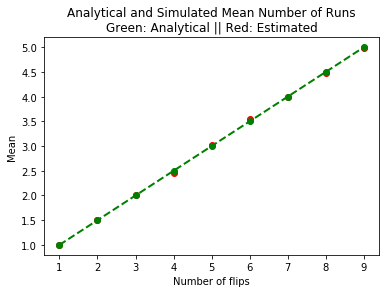

In [2]:
sims = 1000

#

def run_sim(n):

    samp = np.random.choice(a = [0,1], replace = True, size = n)

    runs = np.sum(np.ediff1d(samp) != 0) + 1
    
    return runs

#

def run_sims(n, sims):
    
    return np.mean([run_sim(n) for i in range(sims)])

#



probs = pd.DataFrame({
    'n': np.arange(1,10),
    'SampleMean': [run_sims(sims = sims, n = i) for i in range(1,10)],
    'AnaltMean': [(i-1)/2 + 1 for i in range(1,10)]
})


_ = plt.plot(probs['n'],
             probs['SampleMean'], 
             'ro')

_ = plt.plot(probs['n'],
            probs['AnaltMean'],
            'go--',
            linewidth = 2)

_ = plt.ylabel('Mean')
_ = plt.xlabel('Number of flips')

_ = plt.title('Analytical and Simulated Mean Number of Runs\nGreen: Analytical || Red: Estimated')

# 10.2

You are repeatedly rolling a fair, six-sided die. Let Xn be the cumulative sum of the rolls after n rolls (so, if we roll a 2 and then a 5, X1=2 and X2=7). Find the probability that Xn ever hits 7.

Hint: You may leave your answer as a system of equations. You can quickly solve systems of equations in R with the command solve(a,b), where a is the matrix containing the coefficients of the system, and b is the vector giving the RHS of the system.

### 10.2 Analytical Solution

There's a different approach that doesn't involve a system of equations or Markov chains, just lots of algebra. What we care about is the number of ways to sum the numbers 1 through 6, with repetition, to get 7. This is very close to the concept of the [partition](http://www.luschny.de/math/seq/PartitionsOf7.htm) of 7. The only partition not eligible is '7' since dice only go up to 6. That means there are 14 partitions of 7 under our scheme. Each partition is a valid set of dice rolls with an associated probability.

For example, let's look at {1,1,2,3}. We can observe many permutations of this: {3,2,1,1} , {1,2,3,1}, ... To get the proper number of permutations we need to adjust out for the fact that certain digits are repeated. For this specific partition, that is $4!/2!$ since the '1' is repeated twice. The probability of observing every permutation is simply $(1/6)^4$.

More generally, the full probability of observing a certain partition is:  

## $P(partition) = (1/6)^{\text{partition length}} * \text{(partition length)!/(overcounting adjustment)}$

Finally, the full probability becomes:  

## $P(7) = \sum_{p=1}^{14} P(partition_i)$

Below is the full table of every partition and the associated probability.

$\begin{array}{rr} \hline
Row & Partition         & Prob Sequence            & Permutations & Prob      \\
1   & \{1,1,1,1,1,1,1\} & (1/6)^7 & 1            & 0.00036\% \\
2   & \{1,1,1,1,1,2\}   & (1/6)^6 & 6!/5!        & 0.01286\% \\
3   & \{1,1,1,1,3\}     & (1/6)^5 & 5!/4!        & 0.06430\% \\
4   & \{1,1,1,2,2\}     & (1/6)^5 & 5!/(3!*2!)   & 0.12860\% \\
5   & \{1,1,1,4\}       & (1/6)^4 & 4!/3!        & 0.30864\% \\
6   & \{1,1,2,3\}       & (1/6)^4 & 4!/2!        & 0.92593\% \\
7   & \{1,2,2,2\}       & (1/6)^4 & 4!/3!        & 0.30864\% \\
8   & \{1,1,5\}         & (1/6)^3 & 3!/2!        & 1.38889\% \\
9   & \{1,2,4\}         & (1/6)^3 & 3!           & 2.77778\% \\
10  & \{1,3,3\}         & (1/6)^3 & 3!/2!        & 1.38889\% \\
11  & \{2,2,3\}         & (1/6)^3 & 3!/2!        & 1.38889\% \\
12  & \{1,6\}           & (1/6)^2 & 2            & 5.55556\% \\
13  & \{2,5\}           & (1/6)^2 & 2            & 5.55556\% \\
14  & \{3,4\}           & (1/6)^2 & 2            & 5.55556\% \\
    &                   &                          & Total        & 25.36\%  
\end{array}$


In [3]:
sims = 100000

sim_mean = np.mean([np.any(np.cumsum(np.random.choice([1,2,3,4,5,6], replace = True, size = 7)) == 7) for i in range(sims)])

print('Simulated mean of %.4f' % sim_mean)

Simulated mean of 0.2539


# 10.3

Let X be the Markov Chain with transition matrix such that $q_{i, i + 1} = p$, $q_{i, i} = 1 - p$, and $q_{x + 1, x + 1} = 1$. where x: {0,1,2,3,4,5}.

Let this chain start at State 0 (the first state), and let T be the time it takes, in discrete steps, until absorption (i.e., get to State 5). Find the PMF of T.

### 10.3 Analytical Solution

We're essentially looking at a binary process and waiting until a certain number of successes. This is the definition of the Negative Binomial distribution. We just need to tweak the logic so that we count the total number of flips rather than just the failures. We know there must be 5 successes, so then:

## $P(T - 5 = x) = {5 + x - 1 \choose 5 - 1} p^5 q^x$

## $P(T = t) = {t - 1 \choose 5 - 1} p^5 q^{t - 5}$

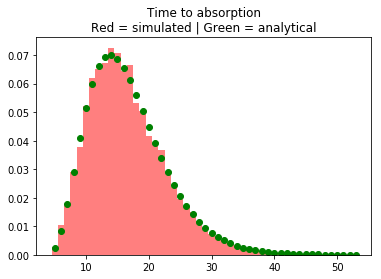

In [4]:
sims = 10000
p = 0.3
n = 6

# Setting up transition matrix
Q = np.zeros((n,n))

np.fill_diagonal(Q, 1-p)

Q[n-1,n-1] = 1

Q[np.arange(0,n-1),np.arange(1,n)] = p

#

def sim_run(n,Q):

    i = 0
    state = [0]
    
    while True:
    
        state = np.random.choice(np.arange(0,n), size = 1, p = Q[state[0],:])

        i += 1
        
        if state == n-1:
            break
    return i

#

sim_runs_res = [sim_run(n,Q) for i in range(sims)]


_ = plt.hist(sim_runs_res, 
         bins = np.arange(np.min(sim_runs_res),np.max(sim_runs_res)+1,1), 
         color = 'red', alpha = 0.5, density = True, align='left')

_ = plt.plot(np.arange(np.max(sim_runs_res)+1) + 5,
             [sps.nbinom.pmf(k = i, n = n-1, p = p) for i in range(np.max(sim_runs_res)+1)], 
             'go')

plt.title("Time to absorption\nRed = simulated | Green = analytical")
plt.show()

# 10.4 + 10.5

Consider a Random Walk on an Undirected Network with 5 states, each state is connected to its adjacent two states.

The arrows are not labeled because each arrow has probability 1/2; that is, there is an equal probability of going clockwise or counterclockwise at every step. Let T be the number of steps it takes to return to State 1. 

Find E(T) without using facts about the stationary distribution. (10.4)  
Find E(T) by using facts about the stationary distribution. (10.5)

Hint: You may leave your answer as a system of equations. You can quickly solve systems of equations in R with the command solve(a,b), where a is the matrix containing the coefficients of the system, and b is the vector giving the RHS of the system.

### 10.4 + 10.5 Analytical Solution

Let $T_i$ be the expected number of steps needed to return to State 1 if we start at Stat i. We are interested in $T_1$. We can write:

### $T_1 = 1 + (T_2 + T_5)/2$

### $T_2 = 1 + T_3/2$

### $T_3 = 1 + (T_4 + T_2)/2$

### $T_4 = 1 + (T_5 + T_3)/2$

### $T_5 = 1 + T_4/2$

We only care about the $T_1$ solution from the system of equations. This becomes:

$\begin{array}{rr2} \hline
T_1 & T_2 & T_3 & T_4 & T_5 \\
1 & -1/2 & 0 & 0 & -1/2 \\
0 & 1 & -1/2 & 0 & 0 \\
0 & -1/2 & 1 & -1/2 & 0 \\
0 & 0 & -1/2 & 1 & -1/2 \\
0 & 0 & 0 & -1/2 & 1
\end{array}$

We end with Ab = **1** and we solve for b numerically. The first element ends up being 5, which is $T_1$.

Also, the return time to State i is the reciprocal of the ith entry in the stationary distribution. Since the stationary distribution must be symmetric this is 1/(1/5) = 5.

In [5]:
# Analytical solution
A = np.array([
  [1, -1/2, 0, 0, -1/2],
  [0, 1, -1/2, 0, 0],
  [0, -1/2, 1, -1/2, 0],
  [0, 0, -1/2, 1, -1/2],
  [0, 0, 0, -1/2, 1]
])

c = np.ones(5)

np.dot(np.linalg.inv(A),c)

array([5., 4., 6., 6., 4.])

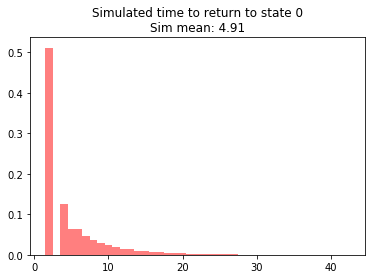

In [6]:
sims = 10000

def run_sim():

    x = 0
    i = 0
    
    while True:
        i += 1

        x += np.random.choice([-1,1])

        x = x % 5

        if x == 0:
            break
        
    return i

#

sim_res = [run_sim() for i in range(sims)]

_ = plt.hist(sim_res, 
         bins = np.arange(np.min(sim_res),np.max(sim_res)+1,1), 
         color = 'red', alpha = 0.5, density = True, align='left')

plt.title("Simulated time to return to state 0\nSim mean: %.2f" % np.mean(sim_res))
plt.show()

# 10.6

Let X∼Pois(λ). Imagine a Markov Chain with X+1 states and transition matrix Q such that $q_{i,i+1}=p$ and $q_{i,i}=1−p$ for i=0,1,...,x and $q_{x+1,x+1}=1$. Let $M_t$ be the value of the chain (the current state) at time t, and let $M_0=0$ (start at 0). Find the PMF of $M_X$.

### 10.6 Analytical Solution

The problem asks for the distribution of the value of the chain (the current state) for a given time t. That is: PMF(lamb, p, t, pos). The fact that there is an absorption state complicates this calculation. To get the total probability of any position at time t we need to account for two sources of uncertainty: the Poisson probability that defines Q and the probability of observing s transitions.

The Poisson PMF is easy to calculate. The probability of s transitions is a bit trickier. This is not exactly a Binomial process since t (the time period) can be greater than the number of states. Here's a practical example:  

p = 0.7  
x = 3 (determines number of states, Poisson)  
t = 5 (input into PMF we want)  
 
Since there are 5 time steps, this is effectively like flipping a coin 5 times. However, we must keep in mind that since there are only 3 states, anything beyond the third success in the flipping process will remain at the third state. That is, 3 is the absorbing state.

P(state = 0 at time 5) = (1-0.7)^5 = 0.00243  
P(state = 1 at time 5) = (0.7)(1-0.7)^4 = 0.00567  
P(state = 2 at time 5) = (0.7)^2(1-0.7)^3 = 0.01323  
P(state = 3 at time 5) = 1 - (0.00243 + 0.00567 + 0.01323) = 0.97867  

In other words, we need to threshold the Binomial distribution if the number of time steps is greater than the number of states. This must be accounted for when computing the joint probability over the Poisson x ThreshBinomial PMF interaction. The analytical solution is implemented below in code.

In [7]:
sims = 10000

#

def sim_run(p,lamb,t,debug=False):

    # Setting up transition matrix
    x = np.random.poisson(lam = lamb, size = 1)[0]

    Q = np.zeros((x+1,x+1))

    np.fill_diagonal(Q, 1-p)

    Q[x,x] = 1

    Q[np.arange(0,x),np.arange(1,x+1)] = p
    
    if debug == True:
        print('x: %s' % (x))
        print(Q)
    
    # Iterate over t steps
    state = [0]
    
    for i in range(1,t+1):
    
        state = np.random.choice(np.arange(0,x+1), size = 1, p = Q[state[0],:])

        if debug == True:
            print('time %s : pos %s' % (i,state[0]))
        
        # Break when reaching absorption
        if state == x+1:
            break
            
    return state[0]

sim_run(p = 0.9, lamb = 7, t = 4, debug = True)

x: 4
[[0.1 0.9 0.  0.  0. ]
 [0.  0.1 0.9 0.  0. ]
 [0.  0.  0.1 0.9 0. ]
 [0.  0.  0.  0.1 0.9]
 [0.  0.  0.  0.  1. ]]
time 1 : pos 1
time 2 : pos 2
time 3 : pos 3
time 4 : pos 3


3

In [8]:
def analt_sol(lamb, p, t):

    prob_acc = np.zeros(shape = t+1)

    for x in range((5*lamb)+1):

        pois_prob = sps.poisson.pmf(k = x, mu = lamb)

        for s in range(t+1):

            if s < x:
                # print('QSize %s : Pos %s : Prob %s' % (x, s, sps.binom.pmf(k = s, n = t, p = p)))
                prob_acc[s] += pois_prob * sps.binom.pmf(k = s, n = t, p = p)

            if s == x:
                # print('QSize %s : Pos %s : Prob %s | tail' % (x, s, 1-sps.binom.cdf(k = x-1, n = t, p = p)))
                prob_acc[x] += pois_prob * (1-sps.binom.cdf(k = x-1, n = t, p = p))
                
    return prob_acc

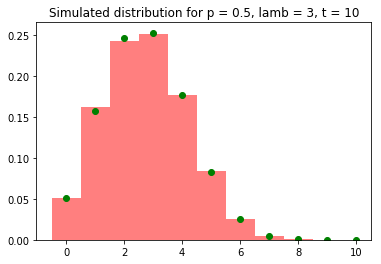

In [9]:
p = 0.5
lamb = 3
t = 10


sim_dist = [sim_run(p = p, lamb = lamb, t = t) for i in range(sims)]

_ = plt.hist(sim_dist, 
         bins = np.arange(np.min(sim_dist),np.max(sim_dist)+2,1), 
         color = 'red', alpha = 0.5, density = True, align='left')

plt.title("Simulated distribution for p = %s, lamb = %s, t = %s" % (p,lamb,t))

_ = plt.plot(np.arange(analt_sol(p = p, lamb = lamb, t = t).size),
             analt_sol(p = p, lamb = lamb, t = t), 
             'go')

plt.show()

# 10.7

Consider this Markov Chain, where a and b are valid probabilities.

$
\begin{array}{lll}
0 & a & 1-a \\
b & 0 & 1-b \\
0 & 0 & 1
\end{array}
$

Let T be the time of absorption (time of arrival at State 3). Imagine that we start at State 1.

a. If a=b=1/2, find E(T).  
b. If a≠b, find E(T).

### 10.7 Analytical Solution

Similarly to problem 10.4, we can set this up as a system of equations:

### $T_1 = (1-a)1 + a(T_2 + 1), 1 = T_1 - aT_2$
### $T_2 = (1-b)1 + b(T_1 + 1), 1 = -bT_1 + T_2$

If we start at state one we either:  
* With probability (1-a), take one step to get to state 3
* With probability a, take one step to get to state 2

We can mirror this logic for state 2. We can then solve the system of equations either manually or computationally. We end up with:  

## $T_1 = \frac{1 + a}{1 - ab}$

In [10]:
def sim_run(n,a,b):

    Q = np.array([
      [0, a, 1-a],
      [b, 0, 1-b],
      [0, 0, 1]
    ])
    
    i = 0
    state = [0]
    
    while True:
    
        state = np.random.choice(np.arange(0,n), size = 1, p = Q[state[0],:])

        # print(state)
        
        i += 1
        
        if state == n-1:
            break
    return i

In [11]:
a = 1/3
b = 2/7

# Analytical solution
A = np.array([
  [1, -a],
  [-b, 1]
])

c = np.array([1,1])

analt_sol = np.dot(np.linalg.inv(A),c)

print('System of eq sol: %.2f %.2f' % (analt_sol[0],analt_sol[1]))
print('Algebra sol: %.2f' % ((1+a)/(1-a*b)))
print('Simulated sol: %.2f' % (np.mean([sim_run(n = 3, a = 1/3, b = 2/7) for i in range(10000)])))

System of eq sol: 1.47 1.42
Algebra sol: 1.47
Simulated sol: 1.46


# 10.8

Are the following process, Xt, Markovian? That is, do they satisfy the Markov property?

a. Imagine a “branching process” with offspring distribution Pois(λ), where λ is known. That is, at generation 0, there is 1 individual who has Pois(λ) offspring in his lifetime, and each of his descendants independently has Pois(λ) offspring. Let $X_t$ be the size of the $t^{th}$ generation.

b. You repeatedly roll a fair die. Let $X_t$ be the value of the $t^{th}$ roll.

c. You repeatedly roll a fair die. Let $X_t$ be the mean of roll 1, roll 2, up to roll t−1.

d. Let $X_t=X_{t−1}+ϵ_t$ where $X_0=0$ and $ϵ_i ∼ N(0,σ^2)$, where $σ^2$ is known.

e. Same as part d., but $σ^2$ is unknown.

### 10.8 Analytical Solution

a. The number of offspring only depends on the last generations' size. This is Markovian.  

b. Since the rolls are presumably independently and indentically distributed, this is not Markovian. Getting a 3 in the last roll has no impact on the next roll.  

c. Since we know the running sum of the rolls, we can just update the sum with the latest observation. This is Markovian since only the latest running sum is needed. We just normalize the sum by t to get the mean.

d) This is Markovian since $X_{t-1}$ impacts $X_t$ and the noise is iid.

e) Since there is uncertainty about the noise, we can use past observations to build a distribution around the unknown variance. Looking back further gives us a better estimate around the variance and hence the next observation. This violates the Markov property.

# 10.9

Cameron is performing a simple, symmetric random walk on the integers; that is, at every integer, he either goes up 1 integer (i.e., 5 to 6) or down 1 integer (i.e., 1 to 0). Let $Y_t$ be his location at time t. He starts at 0 at time 1, so $Y_1=0$.

a. Is $Y_t$ a Markovian process? That is, does it have the Markov property?

b. Find $P(Y_{2t+1} > 0)$. You may leave your answer as a sum.

### 10.9 Analytical Solution

This is definitely a Markov process. Knowing the previous position is all that's needed to take a guess at the next position. If we're at 4, we can either go to 3 or 5 and it doesn't matter how we got to 4.

Since we know that $Y_1=0$, of the ${2t+1}$ trials, we only have $t$ random samples. The process of sampling up/down moves and summing them up resembles the Binomial distribution. Since we now have -1/1 rather than 0/1, this yields us just a shifted Binomial. 

For example, a binomial with n = 4 has support {0,1,2,3.4}. This becomes t = 4 with {-2,-1,0,1,2}. Since we know that p=0.5, this gives us a symmetrical probability mass around 0. Half of t's mass onwards gives us 50% of the cumulative probability. However, getting t up moves lands us at zero. We need to get rid of this effect. This shortcut is identical to getting the cumulative density from t+1 to 2t:  

## $P(Y_{2t+1} > 0) = \frac{1}{2} - \frac{1}{2} * \binom{2t}{t} * \frac{1}{2}^{2t} = \sum_{x = t + 1}^{2t} {2t \choose x} \frac{1}{2^{2t}}$

In [12]:
sims = 10000

t = 10

print('Simulated mean: %.4f' % 
         (np.mean([np.sum(np.random.choice([-1,1], replace = True, size = 2*t)) > 0 for i in range(sims)]))
     )

print('Analytical mean: %.4f' % 
         (0.5 - 1/2*sps.binom.pmf(k = t, n = 2*t, p = 0.5))
     )

Simulated mean: 0.4076
Analytical mean: 0.4119


# 10.10

Cameron is performing a simple, symmetric random walk on the integers; that is, at every integer, he either goes up 1 integer (i.e., 5 to 6) or down 1 integer (i.e., 1 to 0). Let $Y_t$ be his location at time t. He starts at 0 at time 0, so $Y_0=0$.

Find $P(Y_{2t}<0 ∩ max(Y_1,Y_2,...,Y_{2t})\geq3)$, i.e. the probability that the path hits 3 and ends below 0. You may leave your answer as a sum.

Hint: the ‘reflection principle’, which applies to this random walk, states that reflecting a path about a horizontal line (i.e., mimicking a path up until some time t, and then reflecting a path for the rest of the time interval) creates a path that has the same probability as the original path.

### 10.10 Analytical Solution

Any path that ends above 6 must have the same probability as a path that ends below zero. This is by the reflection principle, since we can reflect at the point where it hits 3. So we only care about the probability that we have net 6 successes.

We can consider X as the number of ‘up moves’ in the 2t steps. We can then say that $P(Y_{2t} > 6) = P(X > t+3)$, since if we see more than t+3 up moves, we will have more than 6 up moves more than down moves, which means we will end above 6. We know that X∼Bin(2t,1/2), so we can find this value by summing the PMF of a Binomial:

## $P(X > t + 3) = \sum_{x = t + 4}^{2t} {2t \choose x} \frac{1}{2^{2t}}$

In [13]:
sims = 10000
t = 25


def run_sim(t):
    
    roll_sum = np.cumsum(np.random.choice([-1,1], replace = True, size = 2*t))
    
    if max(roll_sum) >= 3 and roll_sum[2*t-1] < 0:
        return 1
    
    return 0

#

print('Simulated solution: %.4f' % 
         np.mean([run_sim(t = t) for i in range(sims)])
     )

print('Analytical solution: %.4f' % 
         (1 - sps.binom.cdf(k = t + 3, n = 2*t, p = 1/2))
     )

Simulated solution: 0.1637
Analytical solution: 0.1611


# 10.11

A particle is traveling randomly around the vertices of a square. If can only move across vertices connected by edges in one step (i.e., from the bottom left, it can travel to the top left or bottom right, but not the top right). If the particle starts in the top left vertex, what is the probability that it visits the bottom right vertex before it visits the bottom left vertex?

### 10.11 Analytical Solution

This is the Gambler’s ruin problem with i=1 and N=3. This makes the closest target, the bottom left vertex, have a probability of 2/3. Since probabilities sum to 1, this means that the bottom right vertex has a probability of 1/3.

In [14]:
sims = 10000


def run_sim():

    # Start at top left
    p = 0
    
    # Square is [0,1,2,3] clockwise
    while True:

        p += np.random.choice([-1,1])

        p = p % 4

        if p == 2:
            break
        if p == 3:
            break

    return p

#

all_sims = [run_sim() for i in range(sims)]

print('Simulated probability: %.4f' % (sum(1 for i in all_sims if i == 2)/sims))

Simulated probability: 0.3316
